In [1]:
import numpy as np
import pandas as pd
Incident=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Incident data Last 3 years.csv")
Mobilisation=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Mobilisation data Last 3 years.csv", sep=';')
Coordonnees_brigade=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LondonFireBrigade_Coordonnées.csv",sep=';')

In [2]:
Incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381366 entries, 0 to 381365
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          381366 non-null  object 
 1   DateOfCall                              381366 non-null  object 
 2   CalYear                                 381366 non-null  int64  
 3   TimeOfCall                              381366 non-null  object 
 4   HourOfCall                              381366 non-null  int64  
 5   IncidentGroup                           381366 non-null  object 
 6   StopCodeDescription                     381366 non-null  object 
 7   SpecialServiceType                      136659 non-null  object 
 8   PropertyCategory                        381366 non-null  object 
 9   PropertyType                            381366 non-null  object 
 10  AddressQualifier                        3813

In [3]:
Mobilisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560529 entries, 0 to 560528
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            560529 non-null  object 
 1   CalYear                   560529 non-null  int64  
 2   HourOfCall                560529 non-null  int64  
 3   ResourceMobilisationId    560529 non-null  int64  
 4   Resource_Code             560529 non-null  object 
 5   PerformanceReporting      560529 non-null  object 
 6   DateAndTimeMobilised      560529 non-null  object 
 7   DateAndTimeMobile         558164 non-null  object 
 8   DateAndTimeArrived        560529 non-null  object 
 9   TurnoutTimeSeconds        558152 non-null  float64
 10  TravelTimeSeconds         558148 non-null  float64
 11  AttendanceTimeSeconds     560529 non-null  int64  
 12  DateAndTimeLeft           560292 non-null  object 
 13  DateAndTimeReturned       0 non-null       f

In [4]:
Mobilisation_1=Mobilisation[Mobilisation['PerformanceReporting']=='1']

In [5]:
Mobilisation_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361082 entries, 0 to 560528
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            361082 non-null  object 
 1   CalYear                   361082 non-null  int64  
 2   HourOfCall                361082 non-null  int64  
 3   ResourceMobilisationId    361082 non-null  int64  
 4   Resource_Code             361082 non-null  object 
 5   PerformanceReporting      361082 non-null  object 
 6   DateAndTimeMobilised      361082 non-null  object 
 7   DateAndTimeMobile         359135 non-null  object 
 8   DateAndTimeArrived        361082 non-null  object 
 9   TurnoutTimeSeconds        359129 non-null  float64
 10  TravelTimeSeconds         359121 non-null  float64
 11  AttendanceTimeSeconds     361082 non-null  int64  
 12  DateAndTimeLeft           360920 non-null  object 
 13  DateAndTimeReturned       0 non-null       f

In [6]:
Mobilisation_1.drop(['CalYear','HourOfCall'], axis=1,inplace=True)
Final_1=Incident.merge(right=Mobilisation_1, on='IncidentNumber')
Final_1.info()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_15164\1996949902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mobilisation_1.drop(['CalYear','HourOfCall'], axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          359042 non-null  object 
 1   DateOfCall                              359042 non-null  object 
 2   CalYear                                 359042 non-null  int64  
 3   TimeOfCall                              359042 non-null  object 
 4   HourOfCall                              359042 non-null  int64  
 5   IncidentGroup                           359042 non-null  object 
 6   StopCodeDescription                     359042 non-null  object 
 7   SpecialServiceType                      116516 non-null  object 
 8   PropertyCategory                        359042 non-null  object 
 9   PropertyType                            359042 non-null  object 
 10  AddressQualifier                        3590

In [7]:
Final_1['DateOfCall_bis'] = pd.to_datetime(Final_1['DateOfCall'])
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 59 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          359042 non-null  object        
 1   DateOfCall                              359042 non-null  object        
 2   CalYear                                 359042 non-null  int64         
 3   TimeOfCall                              359042 non-null  object        
 4   HourOfCall                              359042 non-null  int64         
 5   IncidentGroup                           359042 non-null  object        
 6   StopCodeDescription                     359042 non-null  object        
 7   SpecialServiceType                      116516 non-null  object        
 8   PropertyCategory                        359042 non-null  object        
 9   PropertyType                         

In [8]:
Final_1.drop(['DateOfCall','DateAndTimeReturned'], axis=1,inplace=True)

In [9]:
def get_minut(date):
    time_decoupe=date.split(':')
    return date.split(':')[1]
Final_1['MinuteOfCall'] = Final_1['TimeOfCall'].apply(get_minut)
Final_1['MinuteOfCall']=Final_1['MinuteOfCall'].astype(int)
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          359042 non-null  object        
 1   CalYear                                 359042 non-null  int64         
 2   TimeOfCall                              359042 non-null  object        
 3   HourOfCall                              359042 non-null  int64         
 4   IncidentGroup                           359042 non-null  object        
 5   StopCodeDescription                     359042 non-null  object        
 6   SpecialServiceType                      116516 non-null  object        
 7   PropertyCategory                        359042 non-null  object        
 8   PropertyType                            359042 non-null  object        
 9   AddressQualifier                     

In [10]:
Final_1.drop(['TimeOfCall','DelayCode_Description','UPRN','USRN'], axis=1,inplace=True)
Final_1.drop(['FRS','PerformanceReporting','Postcode_full','DateAndTimeMobilised',
             'DateAndTimeMobile','DateAndTimeArrived'], axis=1,inplace=True)
Final_1.drop(['PumpOrder','PlusCode_Code','PlusCode_Description','Easting_m','Northing_m'], axis=1,inplace=True)
Final_1.drop(['PumpHoursRoundUp','Notional Cost (£)'], axis=1,inplace=True)
Final_1.drop(['FirstPumpArriving_AttendanceTime','SecondPumpArriving_AttendanceTime',
              'SecondPumpArriving_DeployedFromStation'], axis=1,inplace=True)
Final_1.drop(['PropertyType','SpecialServiceType','Postcode_district','IncGeo_WardCode','IncGeo_WardName',
             'IncGeo_WardNameNew'], axis=1,inplace=True)
Final_1.drop(['IncGeo_BoroughCode','IncGeo_BoroughName'], axis=1,inplace=True)
Final_1.drop(['FirstPumpArriving_DeployedFromStation','DeployedFromStation_Code','DeployedFromLocation'], axis=1,inplace=True)
Final_1.drop(['DateAndTimeLeft'], axis=1,inplace=True)

In [11]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  object        
 4   StopCodeDescription            359042 non-null  object        
 5   PropertyCategory               359042 non-null  object        
 6   AddressQualifier               359042 non-null  object        
 7   ProperCase                     359042 non-null  object        
 8   Easting_rounded                359042 non-null  int64         
 9   Northing_rounded               359042 non-null  int64         
 10  Latitude                       160205 non-null  float64       
 11  

In [12]:
Final_1['DelayCodeId_bis']=Final_1['DelayCodeId'].fillna(12)
Final_1.drop(['DelayCodeId'], axis=1,inplace=True)

In [13]:
Final_1.drop(['StopCodeDescription'], axis=1,inplace=True)

In [49]:
#Final_2['StopCodeDescription']=Final_2['StopCodeDescription'].replace(['AFA','False alarm - Good intent','False alarm - Malicious',
                                                      #'Chimney Fire', 'Late Call', 'Primary Fire', 'Secondary Fire',
                                                      #'Flood call attended - Batch mobilised', 'Special Service',
                                                      #'Use of Special Operations Room'],[1,2,3,4,5,6,7,8,9,10])

In [14]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  object        
 4   PropertyCategory               359042 non-null  object        
 5   AddressQualifier               359042 non-null  object        
 6   ProperCase                     359042 non-null  object        
 7   Easting_rounded                359042 non-null  int64         
 8   Northing_rounded               359042 non-null  int64         
 9   Latitude                       160205 non-null  float64       
 10  Longitude                      160205 non-null  float64       
 11  

In [15]:
Final_1['IncidentGroup']=Final_1['IncidentGroup'].replace(['False Alarm','Fire','Special Service'],[1,2,3])

In [16]:
Final_1.drop(['PropertyCategory','AddressQualifier','Easting_rounded','Northing_rounded'], axis=1,inplace=True)

In [52]:
#Final_2['PropertyCategory']=Final_2['PropertyCategory'].replace(['Aircraft','Boat','Dwelling',
                                                      #'Non Residential', 'Other Residential', 'Outdoor', 'Outdoor Structure',
                                                      #'Rail Vehicle', 'Road Vehicle'],[1,2,3,4,5,6,7,8,9])

In [53]:
#Final_2['AddressQualifier']=Final_2['AddressQualifier'].replace(['Correct incident location','In street close to gazetteer location',
                                                                 #'In street outside gazetteer location', 
                                                                 #'In street remote from gazetteer location', 
                                                                 #'Nearby address - no building in street', 
                                                                 #'Nearby address - street not listed in gazetteer',
                                                                 #'On land associated with building', 
                                                                 #'On motorway / elevated road',
                                                                #'Open land/water - nearest gazetteer location',
                                                                #'Railway land or rolling stock','Within same building'],
                                                                #[1,2,3,4,5,6,7,8,9,10,11])

In [17]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  int64         
 4   ProperCase                     359042 non-null  object        
 5   Latitude                       160205 non-null  float64       
 6   Longitude                      160205 non-null  float64       
 7   IncidentStationGround          359041 non-null  object        
 8   NumStationsWithPumpsAttending  359042 non-null  float64       
 9   NumPumpsAttending              359042 non-null  float64       
 10  PumpCount                      359042 non-null  float64       
 11  

In [55]:
#Final_2['ProperCase']=Final_2['ProperCase'].replace(['Barking And dagenham','Barnet','Bexley','Brent','Bromley','Camden',
                                                     #'City Of london', 'Croydon','Ealing','Enfield','Greenwich','Hackney',
                                                     #'Hammersmith And fulham','Haringey','Harrow','Havering','Hillingdon',
                                                     #'Hounslow','Islington','Kensington And chelsea','Kingston Upon thames',
                                                    #'Lambeth', 'Lewisham','Merton','Newham','Redbridge','Richmond Upon thames',
                                                    #'Southwark','Sutton','Tower Hamlets','Waltham Forest','Wandsworth',
                                                    #'Westminster'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                    #               21,22,23,24,25,26,27,28,29,30,31,32,33])

In [18]:
Final_1.drop(['ProperCase','IncidentStationGround'], axis=1,inplace=True)

In [57]:
#Final_2['IncidentStationGround']=Final_2['IncidentStationGround'].replace(['Acton','Addington','Barking','Barnet','Battersea',
                                                                          #'Beckenham','Bethnal Green','Bexley',
                                                                          # 'Beyond Home Counties','Biggin Hill','Brixton',
                                                                          #'Bromley','Chelsea','Chingford','Chiswick','Clapham',
                                                                          #'Croydon','Dagenham','Deptford','Dockhead','Dowgate',
                                                                          #'Ealing','East Greenwich','East Ham','Edmonton',
                                                                          #'Eltham','Enfield','Erith','Euston','Feltham',
                                                                          #'Finchley','Fordbridge','Forest Hill','Fulham',
                                                                          #'Greenwich','Hainault','Hammersmith','Harold Hill',
                                                                          #'Harrow','Hayes','Heathrow','Hendon','Hertfordshire',
                                                                          #'Heston','Hillingdon','Holloway','Homerton',
                                                                          #  'Hornchurch','Hornsey','Ilford','Islington',
                                                                          #'Kensington','Kentish Town','Kingston','Lambeth',
                                                                          #'Lee Green','Lewisham','Leyton','Leytonstone',
                                                                          #'Mill Hill','Millwall','Mitcham','New Cross',
                                                                          #'New Malden','Norbury','North Kensington','Northolt',
                                                                          # 'Old Kent Road','Orpington','Paddington',
                                                                          #'Park Royal','Peckham','Plaistow','Plumstead',
                                                                          #'Poplar','Purley','Richmond','Romford','Ruislip',
                                                                          #'Shadwell','Shoreditch','Sidcup','Soho','Southall',
                                                                          #'Southgate','Stanmore','Stoke Newington','Stratford',
                                                                          #'Surbiton','Sutton','Tooting','Tottenham',
                                                                          # 'Twickenham','Wallington','Walthamstow','Wandsworth',
                                                                          #'Wembley','Wennington','West Hampstead','West Norwood',
                                                                          #'Whitechapel','Willesden','Wimbledon','Woodford',
                                                                          #'Woodside'],
                                                                          #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                          # 21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                                                                          #39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                                          #57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                                          #75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                                          #93,94,95,96,97,98,99,100,101,102,103,104,105])

In [58]:
Final_2['DeployedFromStation_Name']=Final_2['DeployedFromStation_Name'].replace(['Acton','Addington','Barking','Barnet','Battersea',
                                                                          'Beckenham','Bethnal Green','Bexley',
                                                                           'Beyond Home Counties','Biggin Hill','Brixton',
                                                                          'Bromley','Chelsea','Chingford','Chiswick','Clapham',
                                                                          'Croydon','Dagenham','Deptford','Dockhead','Dowgate',
                                                                          'Ealing','East Greenwich','East Ham','Edmonton',
                                                                          'Eltham','Enfield','Erith','Euston','Feltham',
                                                                          'Finchley','Fordbridge','Forest Hill','Fulham',
                                                                          'Greenwich','Hainault','Hammersmith','Harold Hill',
                                                                          'Harrow','Hayes','Heathrow','Hendon','Hertfordshire',
                                                                          'Heston','Hillingdon','Holloway','Homerton',
                                                                            'Hornchurch','Hornsey','Ilford','Islington',
                                                                          'Kensington','Kentish Town','Kingston','Lambeth',
                                                                          'Lee Green','Lewisham','Leyton','Leytonstone',
                                                                          'Mill Hill','Millwall','Mitcham','New Cross',
                                                                          'New Malden','Norbury','North Kensington','Northolt',
                                                                           'Old Kent Road','Orpington','Paddington',
                                                                          'Park Royal','Peckham','Plaistow','Plumstead',
                                                                          'Poplar','Purley','Richmond','Romford','Ruislip',
                                                                          'Shadwell','Shoreditch','Sidcup','Soho','Southall',
                                                                          'Southgate','Stanmore','Stoke Newington','Stratford',
                                                                          'Surbiton','Sutton','Tooting','Tottenham',
                                                                           'Twickenham','Wallington','Walthamstow','Wandsworth',
                                                                          'Wembley','Wennington','West Hampstead','West Norwood',
                                                                          'Whitechapel','Willesden','Wimbledon','Woodford',
                                                                          'Woodside'],
                                                                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                           21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                                                                          39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                                          57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                                          75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                                          93,94,95,96,97,98,99,100,101,102,103,104,105])

In [19]:
from datetime import date
Final_1['Joursem']=Final_1['DateOfCall_bis'].dt.weekday

In [20]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  int64         
 4   Latitude                       160205 non-null  float64       
 5   Longitude                      160205 non-null  float64       
 6   NumStationsWithPumpsAttending  359042 non-null  float64       
 7   NumPumpsAttending              359042 non-null  float64       
 8   PumpCount                      359042 non-null  float64       
 9   NumCalls                       359041 non-null  float64       
 10  ResourceMobilisationId         359042 non-null  int64         
 11  

In [21]:
Calendrier=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/London_Pompyer_Calendrier.csv", sep=';')
Calendrier['DateOfCall_bis'] = pd.to_datetime(Calendrier['DateOfCall_bis'])

C:\Users\agrabia\AppData\Local\Temp\ipykernel_15164\1042827561.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Calendrier['DateOfCall_bis'] = pd.to_datetime(Calendrier['DateOfCall_bis'])


In [22]:
Calendrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateOfCall_bis            1247 non-null   datetime64[ns]
 1   jour ferie                1247 non-null   int64         
 2   vacances                  1247 non-null   int64         
 3   COVID (fermeture ecoles)  1247 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.1 KB


In [23]:
Final_1=Final_1.merge(right=Calendrier, on='DateOfCall_bis')
Final_1=Final_1.merge(right=Coordonnees_brigade, on='DeployedFromStation_Name')
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348679 entries, 0 to 348678
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 348679 non-null  object        
 1   CalYear                        348679 non-null  int64         
 2   HourOfCall                     348679 non-null  int64         
 3   IncidentGroup                  348679 non-null  int64         
 4   Latitude_x                     155892 non-null  float64       
 5   Longitude_x                    155892 non-null  float64       
 6   NumStationsWithPumpsAttending  348679 non-null  float64       
 7   NumPumpsAttending              348679 non-null  float64       
 8   PumpCount                      348679 non-null  float64       
 9   NumCalls                       348678 non-null  float64       
 10  ResourceMobilisationId         348679 non-null  int64         
 11  

In [24]:
Final_1.drop(['Resource_Code'], axis=1,inplace=True)
Final_1.drop(['Adresse'], axis=1,inplace=True)
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348679 entries, 0 to 348678
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 348679 non-null  object        
 1   CalYear                        348679 non-null  int64         
 2   HourOfCall                     348679 non-null  int64         
 3   IncidentGroup                  348679 non-null  int64         
 4   Latitude_x                     155892 non-null  float64       
 5   Longitude_x                    155892 non-null  float64       
 6   NumStationsWithPumpsAttending  348679 non-null  float64       
 7   NumPumpsAttending              348679 non-null  float64       
 8   PumpCount                      348679 non-null  float64       
 9   NumCalls                       348678 non-null  float64       
 10  ResourceMobilisationId         348679 non-null  int64         
 11  

In [25]:
Final_1=Final_1.dropna()
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154616 entries, 1 to 348677
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 154616 non-null  object        
 1   CalYear                        154616 non-null  int64         
 2   HourOfCall                     154616 non-null  int64         
 3   IncidentGroup                  154616 non-null  int64         
 4   Latitude_x                     154616 non-null  float64       
 5   Longitude_x                    154616 non-null  float64       
 6   NumStationsWithPumpsAttending  154616 non-null  float64       
 7   NumPumpsAttending              154616 non-null  float64       
 8   PumpCount                      154616 non-null  float64       
 9   NumCalls                       154616 non-null  float64       
 10  ResourceMobilisationId         154616 non-null  int64         
 11  

In [26]:
Final_1.head()

,IncidentNumber,CalYear,HourOfCall,IncidentGroup,Latitude_x,Longitude_x,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,NumCalls,...,DeployedFromStation_Name,DateOfCall_bis,MinuteOfCall,DelayCodeId_bis,Joursem,jour ferie,vacances,COVID (fermeture ecoles),Latitude_y,Longitude_y
1,000037-01012020,2020,0,2,51.550662,-0.447747,1.0,1.0,1.0,1.0,...,Hillingdon,2020-01-01,27,9.0,2,1,1,0,51.532268,-0.451897
2,000177-01012020,2020,4,2,51.549455,-0.482830,1.0,1.0,1.0,1.0,...,Hillingdon,2020-01-01,56,12.0,2,1,1,0,51.532268,-0.451897
3,000206-01012020,2020,7,1,51.549674,-0.432116,2.0,3.0,3.0,1.0,...,Hillingdon,2020-01-01,13,12.0,2,1,1,0,51.532268,-0.451897
4,000294-01012020,2020,12,3,51.532061,-0.452014,1.0,1.0,1.0,1.0,...,Hillingdon,2020-01-01,40,12.0,2,1,1,0,51.532268,-0.451897
10,001979-05012020,2020,17,1,51.533555,-0.407724,1.0,2.0,2.0,1.0,...,Hillingdon,2020-01-05,30,12.0,6,0,0,0,51.532268,-0.451897


In [27]:
import math

def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    Latitude_x, Longitude_x = coord1
    Latitude_y, Longitude_y = coord2
    
    phi1, phi2 = math.radians(Latitude_x), math.radians(Latitude_y) 
    dphi       = math.radians(Latitude_y - Latitude_x)
    dlambda    = math.radians(Longitude_y - Longitude_x)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [28]:
coord1 = Final_1['Latitude_x'], Final_1['Longitude_x']
coord2 = Final_1['Latitude_y'], Final_1['Longitude_y']

for i in Final_1:
    Final_1['distance'] = haversine(coord1, coord2)

TypeError: cannot convert the series to <class 'float'>

In [29]:
Final_1['distance'] = np.sqrt((Final_1['Latitude_x']-Final_1["Latitude_y"])**2+(Final_1['Longitude_x']-Final_1["Longitude_y"])**2)

In [30]:
Final_1.head()

,IncidentNumber,CalYear,HourOfCall,IncidentGroup,Latitude_x,Longitude_x,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,NumCalls,...,DateOfCall_bis,MinuteOfCall,DelayCodeId_bis,Joursem,jour ferie,vacances,COVID (fermeture ecoles),Latitude_y,Longitude_y,distance
1,000037-01012020,2020,0,2,51.550662,-0.447747,1.0,1.0,1.0,1.0,...,2020-01-01,27,9.0,2,1,1,0,51.532268,-0.451897,0.018856
2,000177-01012020,2020,4,2,51.549455,-0.482830,1.0,1.0,1.0,1.0,...,2020-01-01,56,12.0,2,1,1,0,51.532268,-0.451897,0.035387
3,000206-01012020,2020,7,1,51.549674,-0.432116,2.0,3.0,3.0,1.0,...,2020-01-01,13,12.0,2,1,1,0,51.532268,-0.451897,0.026349
4,000294-01012020,2020,12,3,51.532061,-0.452014,1.0,1.0,1.0,1.0,...,2020-01-01,40,12.0,2,1,1,0,51.532268,-0.451897,0.000238
10,001979-05012020,2020,17,1,51.533555,-0.407724,1.0,2.0,2.0,1.0,...,2020-01-05,30,12.0,6,0,0,0,51.532268,-0.451897,0.044191


In [33]:
pip install geopy

     -------------------------------------- 125.4/125.4 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
import geopy.distance
def calc_orthodromic(row):
    try:
        return geopy.distance.geodesic(row["XY"], row["XY_cas"]).km
    except:
        return np.NaN

Final_1['XY'] = list(zip(Final_1["Latitude_x"], Final_1["Longitude_x"]))
Final_1['XY_cas'] = list(zip(Final_1["Latitude_y"], Final_1["Longitude_y"]))

Final_1['distanceb'] = Final_1.apply(calc_orthodromic, axis=1)

In [42]:
Final_1.head()

,IncidentNumber,CalYear,HourOfCall,IncidentGroup,Latitude_x,Longitude_x,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,NumCalls,...,Joursem,jour ferie,vacances,COVID (fermeture ecoles),Latitude_y,Longitude_y,distance,XY,XY_cas,distanceb
1,000037-01012020,2020,0,2,51.550662,-0.447747,1.0,1.0,1.0,1.0,...,2,1,1,0,51.532268,-0.451897,0.018856,"(51.5506615814, -0.4477467717)","(51.53226759272693, -0.4518969650572493)",2.066646
2,000177-01012020,2020,4,2,51.549455,-0.482830,1.0,1.0,1.0,1.0,...,2,1,1,0,51.532268,-0.451897,0.035387,"(51.5494546062, -0.4828295054)","(51.53226759272693, -0.4518969650572493)",2.874379
3,000206-01012020,2020,7,1,51.549674,-0.432116,2.0,3.0,3.0,1.0,...,2,1,1,0,51.532268,-0.451897,0.026349,"(51.5496739404, -0.432115647)","(51.53226759272693, -0.4518969650572493)",2.373585
4,000294-01012020,2020,12,3,51.532061,-0.452014,1.0,1.0,1.0,1.0,...,2,1,1,0,51.532268,-0.451897,0.000238,"(51.5320605337, -0.4520144545)","(51.53226759272693, -0.4518969650572493)",0.024437
10,001979-05012020,2020,17,1,51.533555,-0.407724,1.0,2.0,2.0,1.0,...,6,0,0,0,51.532268,-0.451897,0.044191,"(51.5335554797, -0.4077244925)","(51.53226759272693, -0.4518969650572493)",3.068497


In [43]:
Final_1.drop(['NumStationsWithPumpsAttending','NumPumpsAttending','PumpCount','distance'], axis=1,inplace=True)
Final_1.head()

,IncidentNumber,CalYear,HourOfCall,IncidentGroup,Latitude_x,Longitude_x,NumCalls,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,...,DelayCodeId_bis,Joursem,jour ferie,vacances,COVID (fermeture ecoles),Latitude_y,Longitude_y,XY,XY_cas,distanceb
1,000037-01012020,2020,0,2,51.550662,-0.447747,1.0,5547511,118.0,255.0,...,9.0,2,1,1,0,51.532268,-0.451897,"(51.5506615814, -0.4477467717)","(51.53226759272693, -0.4518969650572493)",2.066646
2,000177-01012020,2020,4,2,51.549455,-0.482830,1.0,5547713,102.0,236.0,...,12.0,2,1,1,0,51.532268,-0.451897,"(51.5494546062, -0.4828295054)","(51.53226759272693, -0.4518969650572493)",2.874379
3,000206-01012020,2020,7,1,51.549674,-0.432116,1.0,5547751,106.0,204.0,...,12.0,2,1,1,0,51.532268,-0.451897,"(51.5496739404, -0.432115647)","(51.53226759272693, -0.4518969650572493)",2.373585
4,000294-01012020,2020,12,3,51.532061,-0.452014,1.0,5547874,12.0,1.0,...,12.0,2,1,1,0,51.532268,-0.451897,"(51.5320605337, -0.4520144545)","(51.53226759272693, -0.4518969650572493)",0.024437
10,001979-05012020,2020,17,1,51.533555,-0.407724,1.0,5550121,64.0,371.0,...,12.0,6,0,0,0,51.532268,-0.451897,"(51.5335554797, -0.4077244925)","(51.53226759272693, -0.4518969650572493)",3.068497


In [44]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154616 entries, 1 to 348677
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   IncidentNumber            154616 non-null  object        
 1   CalYear                   154616 non-null  int64         
 2   HourOfCall                154616 non-null  int64         
 3   IncidentGroup             154616 non-null  int64         
 4   Latitude_x                154616 non-null  float64       
 5   Longitude_x               154616 non-null  float64       
 6   NumCalls                  154616 non-null  float64       
 7   ResourceMobilisationId    154616 non-null  int64         
 8   TurnoutTimeSeconds        154616 non-null  float64       
 9   TravelTimeSeconds         154616 non-null  float64       
 10  AttendanceTimeSeconds     154616 non-null  int64         
 11  DeployedFromStation_Name  154616 non-null  object        
 12  Da

In [45]:
Final_1.drop(['ResourceMobilisationId','NumCalls','XY','XY_cas'], axis=1,inplace=True)
Final_1.head()

,IncidentNumber,CalYear,HourOfCall,IncidentGroup,Latitude_x,Longitude_x,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Name,DateOfCall_bis,MinuteOfCall,DelayCodeId_bis,Joursem,jour ferie,vacances,COVID (fermeture ecoles),Latitude_y,Longitude_y,distanceb
1,000037-01012020,2020,0,2,51.550662,-0.447747,118.0,255.0,373,Hillingdon,2020-01-01,27,9.0,2,1,1,0,51.532268,-0.451897,2.066646
2,000177-01012020,2020,4,2,51.549455,-0.482830,102.0,236.0,338,Hillingdon,2020-01-01,56,12.0,2,1,1,0,51.532268,-0.451897,2.874379
3,000206-01012020,2020,7,1,51.549674,-0.432116,106.0,204.0,310,Hillingdon,2020-01-01,13,12.0,2,1,1,0,51.532268,-0.451897,2.373585
4,000294-01012020,2020,12,3,51.532061,-0.452014,12.0,1.0,13,Hillingdon,2020-01-01,40,12.0,2,1,1,0,51.532268,-0.451897,0.024437
10,001979-05012020,2020,17,1,51.533555,-0.407724,64.0,371.0,435,Hillingdon,2020-01-05,30,12.0,6,0,0,0,51.532268,-0.451897,3.068497


C:\Users\agrabia\AppData\Local\Temp\ipykernel_15164\3338990595.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_1.corr(),annot=True,cmap='RdBu_r',center=0);


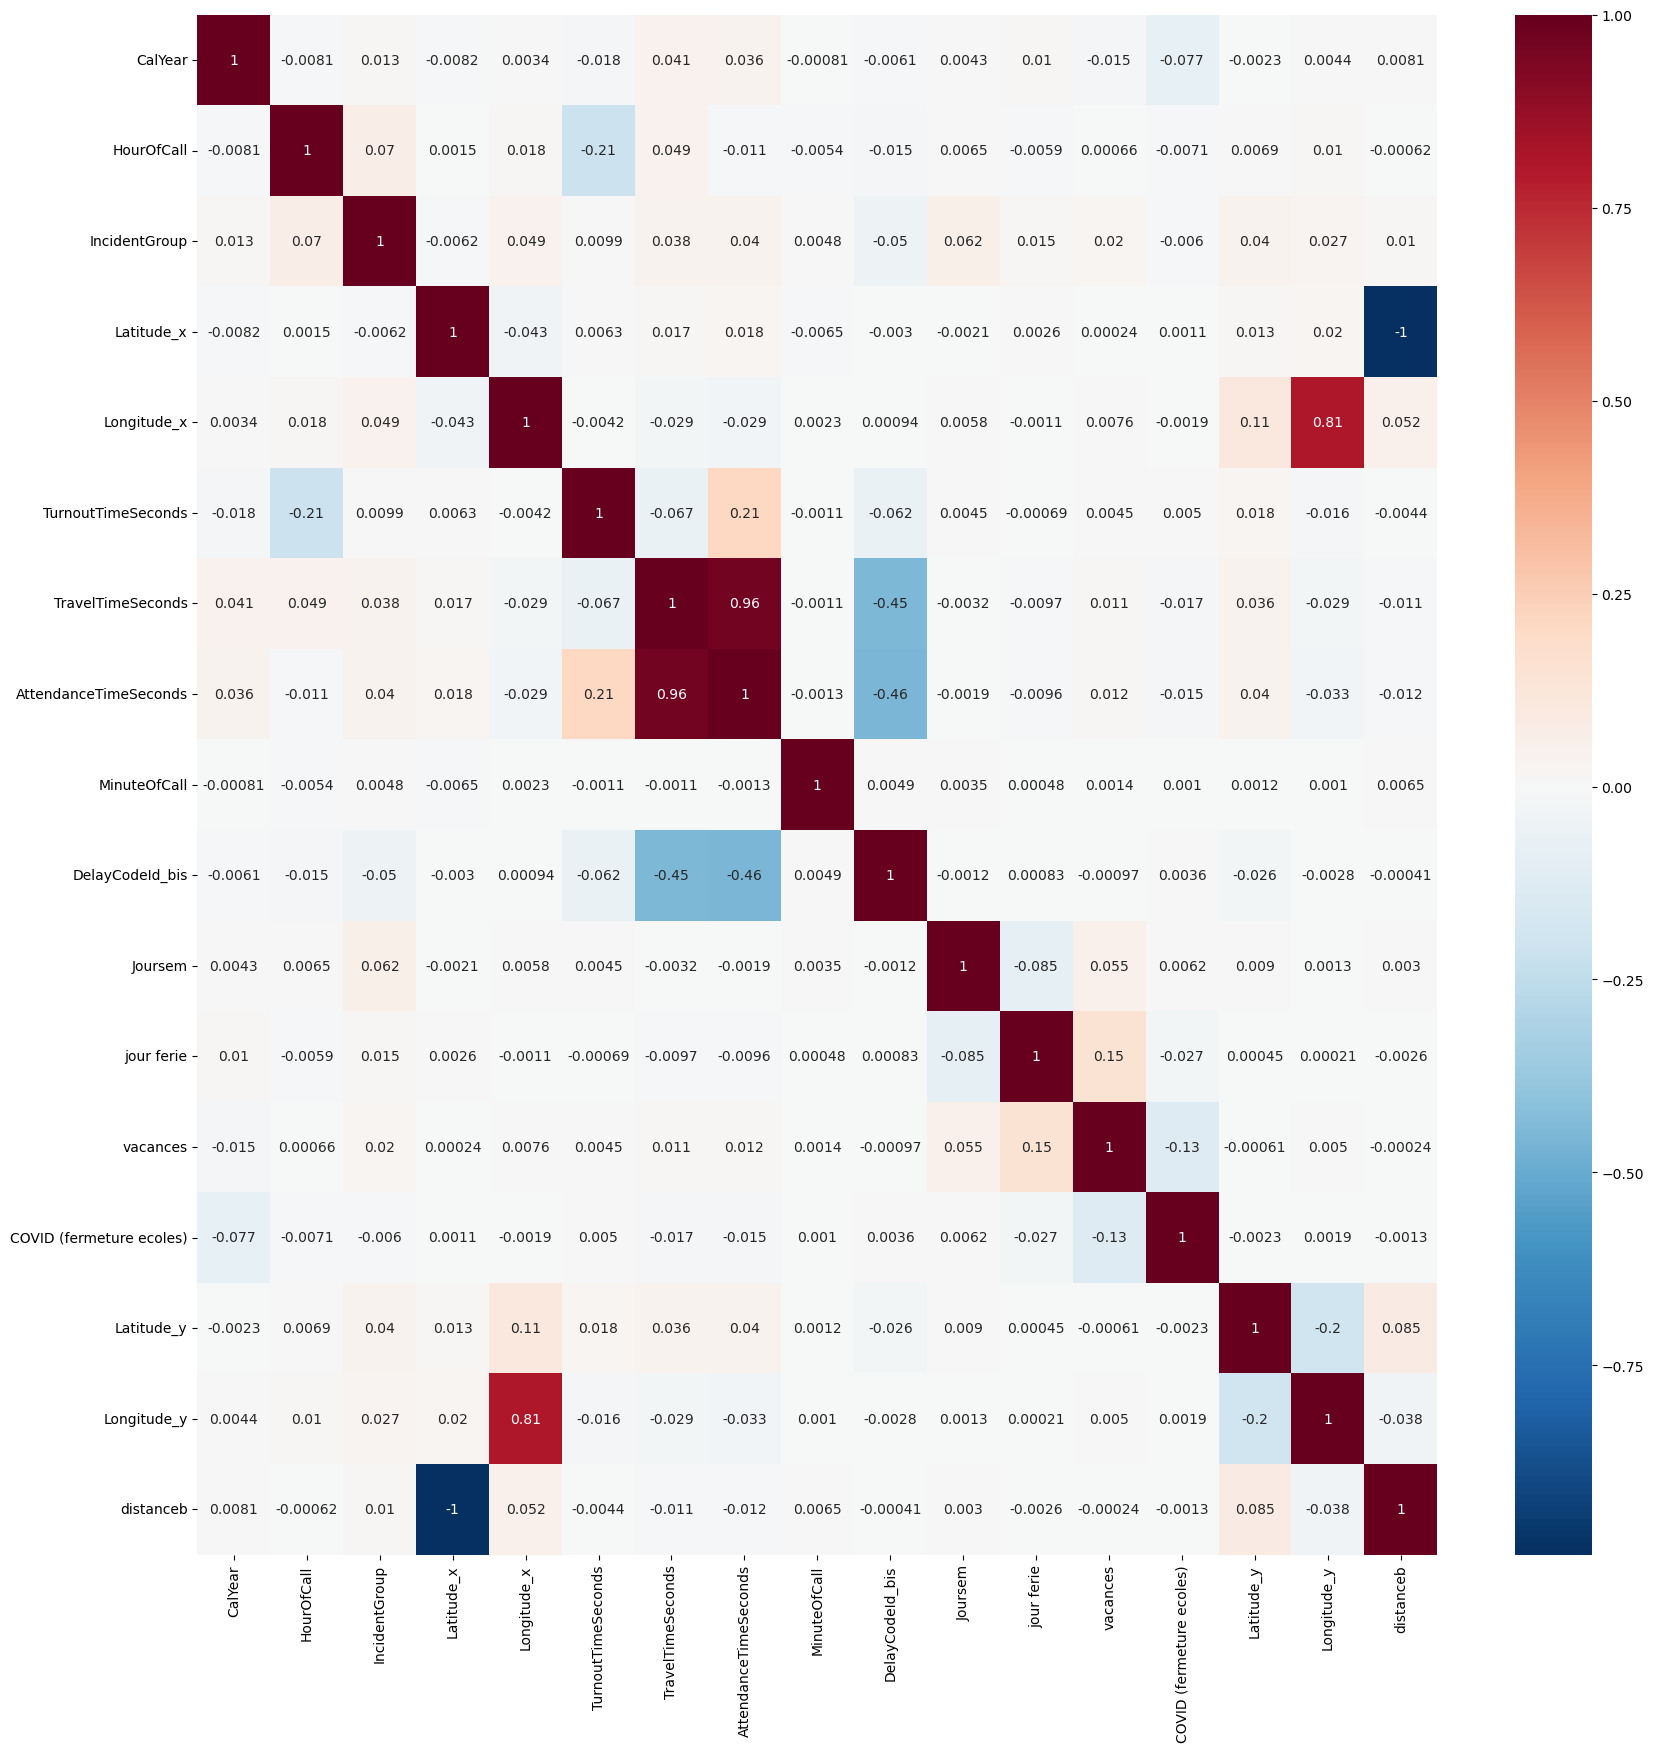

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(Final_1.corr(),annot=True,cmap='RdBu_r',center=0);

In [47]:
Final_1.to_csv (r"C:\Users\agrabia\Documents\Formation\Projet/Final_1_corr.csv", index = False, header=True)